### Import Libraries

In [1]:
import warnings

import altair as alt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# creats a df from a combined csv file made from three provided csv's
all_data = pd.read_csv("../Data/All_Data/combined_all.csv")

# created a df from the sales data from the provided .txt file
sales = pd.read_csv("../Data/Sales/Sample_Sales.txt", delimiter="\t", sep=" ")

In [3]:
# See how much of the dataframe has NaN or Null values
(sales.isnull().sum()) / len(sales) * 100

Invoice Numbers        77.795786
Customer Name          78.930308
Address Line           78.930308
City                   78.930308
St                     78.930308
Zip Code               78.930308
Email Address          78.930308
Product Number          2.431118
Product Description     2.431118
Qty                     2.431118
Invoicetotal           78.930308
dtype: float64

In [4]:
# Drop the NaN/Null value, than verify the these values are gone
sales = sales.dropna()
sales.isnull().sum()

Invoice Numbers        0
Customer Name          0
Address Line           0
City                   0
St                     0
Zip Code               0
Email Address          0
Product Number         0
Product Description    0
Qty                    0
Invoicetotal           0
dtype: int64

In [5]:
# Look at the first five rows
sales.head(5)

,Invoice Numbers,Customer Name,Address Line,City,St,Zip Code,Email Address,Product Number,Product Description,Qty,Invoicetotal
0,31507427,AARON HARRIS,8685 VIA NAPOLEONE CIR,LAS VEGAS,NV,89143.0,abharis@gmail.com,SIL-PS-MTXL,SILVER CHIL PS TXL (SEALY-BEK,1.0,4770.94
10,30507598,ALEJANDRO MARES-AYALA,162 SAND DUNE CT,HENDERSON,NV,89074.0,alexmex76@live.com,PROAD-SOFT-MCK,PROADAPT SOFT CALKING (TEMP-BC,1.0,4052.13
15,30508158,ALEX HERNANDEZ,6275 BOULDER HWY,LAS VEGAS,NV,89122.0,javier.miquel354@gmail.com,VIEW-PT-MF,OCEAN VIEW PT FULL (SHER-BF),1.0,758.60
20,35508089,ALICIA CICCHETTI,8925 ARCADIA HEIGHTS ST,LAS VEGAS,NV,89113.0,alicia89145@yahoo.com,VIEW-PT-MCK,OCEAN VIEW PT CALKING (SHER-BC,1.0,910.33
24,34504090,AMY ESKER,1235 SMITH,HENDERSON,NV,89044.0,bm@bestmatt.com,CHARCOAL-QN,QN SHOULDER CHARCOAL PILLOW,1.0,54.18


In [6]:
# Set all string to lower case to make merging of the files easier
all_data = all_data.applymap(lambda s: s.lower() if type(s) == str else s)
sales = sales.applymap(lambda s: s.lower() if type(s) == str else s)
all_data.rename(
    columns={"address": "Address Line", "Invoicetotal": "Invoice Total"}, inplace=True
)

In [7]:
df = sales.merge(all_data, on="Address Line", how="left")
df

,Invoice Numbers,Customer Name,Address Line,City,St,Zip Code,Email Address,Product Number,Product Description,Qty,Invoicetotal,city,state,zip,zip-4
0,31507427,aaron harris,8685 via napoleone cir,las vegas,nv,89143.0,abharis@gmail.com,sil-ps-mtxl,silver chil ps txl (sealy-bek,1.0,4770.94,NaN,NaN,NaN,NaN
1,30507598,alejandro mares-ayala,162 sand dune ct,henderson,nv,89074.0,alexmex76@live.com,proad-soft-mck,proadapt soft calking (temp-bc,1.0,4052.13,henderson,nv,89074.0,3222.0
2,30508158,alex hernandez,6275 boulder hwy,las vegas,nv,89122.0,javier.miquel354@gmail.com,view-pt-mf,ocean view pt full (sher-bf),1.0,758.60,NaN,NaN,NaN,NaN
3,35508089,alicia cicchetti,8925 arcadia heights st,las vegas,nv,89113.0,alicia89145@yahoo.com,view-pt-mck,ocean view pt calking (sher-bc,1.0,910.33,las vegas,nv,89113.0,6111.0
4,34504090,amy esker,1235 smith,henderson,nv,89044.0,bm@bestmatt.com,charcoal-qn,qn shoulder charcoal pillow,1.0,54.18,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,34505610,vivian shin,709 altacrest dr,las vegas,nv,89123.0,vshin81@gmail.com,hur-f-mq,hurston lux firm queen(sf2bq),1.0,3803.92,las vegas,nv,89123.0,750.0
238,34505733,yuanri wu,6231 bravestar court,las vegas,nv,89141.0,adayuan20@live.com,dough-kg,dough w/ z gel pillow kg,2.0,650.25,NaN,NaN,NaN,NaN
239,34506493,yuanri wu,6231 bravestar court,las vegas,nv,89141.0,adayuan20@live.com,dough-kg,dough w/ z gel pillow kg,2.0,-108.35,NaN,NaN,NaN,NaN
240,34507537,zhoucheng zhu,8255 s las vegas blvd,las vegas,nv,89123.0,1002666124@qq.com,up-f-mq,upbeat firm queen (sealy-bq,1.0,541.86,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['Invoice Numbers', 'Customer Name', 'Address Line', 'City', 'St',
       'Zip Code', 'Email Address', 'Product Number', 'Product Description',
       'Qty', 'Invoicetotal', 'city', 'state', 'zip', 'zip-4'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Invoice Numbers      242 non-null    object 
 1   Customer Name        242 non-null    object 
 2   Address Line         242 non-null    object 
 3   City                 242 non-null    object 
 4   St                   242 non-null    object 
 5   Zip Code             242 non-null    float64
 6   Email Address        242 non-null    object 
 7   Product Number       242 non-null    object 
 8   Product Description  242 non-null    object 
 9   Qty                  242 non-null    float64
 10  Invoicetotal         242 non-null    float64
 11  city                 73 non-null     object 
 12  state                73 non-null     object 
 13  zip                  73 non-null     float64
 14  zip-4                73 non-null     float64
dtypes: float64(5), object(10)
memory usage: 

In [10]:
df.duplicated(subset=["Address Line"]).sum()

85

In [11]:
(df.isnull().sum()) / len(df) * 100

Invoice Numbers         0.000000
Customer Name           0.000000
Address Line            0.000000
City                    0.000000
St                      0.000000
Zip Code                0.000000
Email Address           0.000000
Product Number          0.000000
Product Description     0.000000
Qty                     0.000000
Invoicetotal            0.000000
city                   69.834711
state                  69.834711
zip                    69.834711
zip-4                  69.834711
dtype: float64

In [12]:
df.drop(["city", "state", "zip", "zip-4"], axis=1, inplace=True)
df

,Invoice Numbers,Customer Name,Address Line,City,St,Zip Code,Email Address,Product Number,Product Description,Qty,Invoicetotal
0,31507427,aaron harris,8685 via napoleone cir,las vegas,nv,89143.0,abharis@gmail.com,sil-ps-mtxl,silver chil ps txl (sealy-bek,1.0,4770.94
1,30507598,alejandro mares-ayala,162 sand dune ct,henderson,nv,89074.0,alexmex76@live.com,proad-soft-mck,proadapt soft calking (temp-bc,1.0,4052.13
2,30508158,alex hernandez,6275 boulder hwy,las vegas,nv,89122.0,javier.miquel354@gmail.com,view-pt-mf,ocean view pt full (sher-bf),1.0,758.60
3,35508089,alicia cicchetti,8925 arcadia heights st,las vegas,nv,89113.0,alicia89145@yahoo.com,view-pt-mck,ocean view pt calking (sher-bc,1.0,910.33
4,34504090,amy esker,1235 smith,henderson,nv,89044.0,bm@bestmatt.com,charcoal-qn,qn shoulder charcoal pillow,1.0,54.18
...,...,...,...,...,...,...,...,...,...,...,...
237,34505610,vivian shin,709 altacrest dr,las vegas,nv,89123.0,vshin81@gmail.com,hur-f-mq,hurston lux firm queen(sf2bq),1.0,3803.92
238,34505733,yuanri wu,6231 bravestar court,las vegas,nv,89141.0,adayuan20@live.com,dough-kg,dough w/ z gel pillow kg,2.0,650.25
239,34506493,yuanri wu,6231 bravestar court,las vegas,nv,89141.0,adayuan20@live.com,dough-kg,dough w/ z gel pillow kg,2.0,-108.35
240,34507537,zhoucheng zhu,8255 s las vegas blvd,las vegas,nv,89123.0,1002666124@qq.com,up-f-mq,upbeat firm queen (sealy-bq,1.0,541.86


### Use pandas-profiler for a broad overview of the data

In [13]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# profile.to_file("Sale_Data.html")

### Plot Invoice Total and Zip Code for insight into with zip code saw the must revenue 

In [15]:
df1 = df.copy()
df1["Zip Code"] = df1["Zip Code"].astype(int)

In [16]:
df1["Zip Code"].unique()

array([89143, 89074, 89122, 89113, 89044, 89104, 89015, 89084, 89179,
       89002, 89147, 89011, 89148, 89118, 89130, 89119, 89178, 89149,
       89129, 89005, 89108, 89012, 89183, 89121, 89031, 89103, 89014,
       89134, 89101, 89128, 89061, 89004, 89166, 89141, 89032, 89139,
       89131, 89135, 89052, 89161, 32163, 89123])

In [17]:
df1["sales"] = df1["Invoicetotal"]

In [18]:
df1["sales"]

0      4770.94
1      4052.13
2       758.60
3       910.33
4        54.18
        ...   
237    3803.92
238     650.25
239    -108.35
240     541.86
241    6228.79
Name: sales, Length: 242, dtype: float64

In [19]:
df1 = df1.groupby(["Zip Code"])["sales"].sum().sort_values(ascending=False)
df1 = df1.to_frame()

In [20]:
df1.info

<bound method DataFrame.info of              sales
Zip Code          
89178     67028.55
89074     19265.29
89166     17221.44
89002     16550.04
89031     15842.80
89130     15054.96
89015     14072.47
89141     10377.56
89012      8461.26
89134      8204.65
89129      7365.82
89121      7001.64
89118      6949.68
89131      6615.30
89139      6524.87
89108      6485.70
89122      5652.72
89148      5162.62
89032      4900.69
89183      4876.33
89161      4822.67
89143      4770.94
89179      4595.03
89084      4481.83
32163      4377.26
89123      4345.78
89135      4161.58
89104      3738.92
89014      3167.08
89052      3065.89
89103      2887.06
89004      2675.63
89113      2544.87
89119      2492.61
89005      2026.59
89147      1484.68
89044       871.48
89061       836.05
89128       796.05
89149       574.37
89011       437.40
89101       216.74>

In [21]:
zip = [
    "89143",
    "89074",
    "89122",
    "89113",
    "89044",
    "89104",
    "89015",
    "89084",
    "89179",
    "89002",
    "89147",
    "89011",
    "89148",
    "89118",
    "89130",
    "89119",
    "89178",
    "89149",
    "89129",
    "89005",
    "89108",
    "89012",
    "89183",
    "89121",
    "89031",
    "89103",
    "89014",
    "89134",
    "89101",
    "89128",
    "89061",
    "89004",
    "89166",
    "89141",
    "89032",
    "89139",
    "89131",
    "89135",
    "89052",
    "89161",
    "32163",
    "89123",
]

In [22]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (8, 15)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

Text(0, 0.5, 'Zip Code')

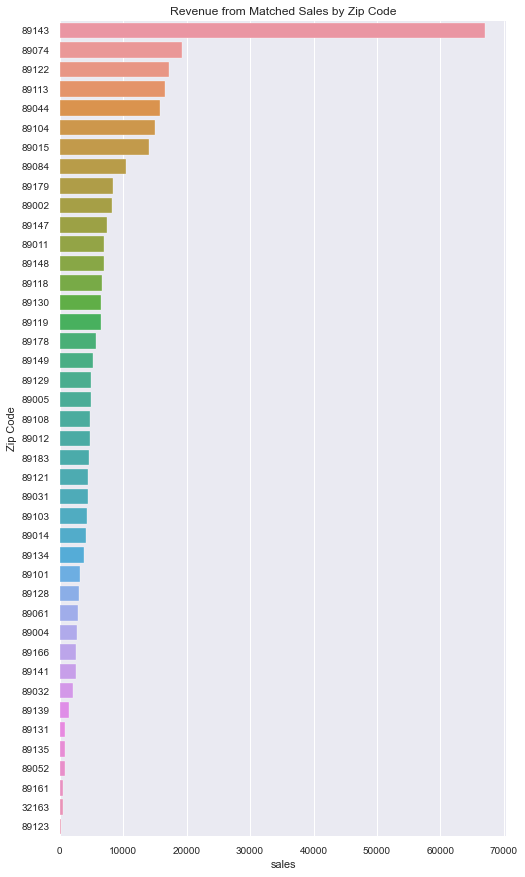

In [23]:
sns.barplot(x="sales", y=zip, data=df1)
plt.title("Revenue from Matched Sales by Zip Code")
plt.ylabel("Zip Code")

In [24]:
s = df1["sales"].sum().round(2)
print(f"Total Revenue: ${s}")

Total Revenue: $312984.9


### Look at popular products by how frequently they apper in the data

In [25]:
ad_copy = pd.read_csv("../Data/All_Data/combined_all.csv")
s_copy = pd.read_csv("../Data/Sales/Sample_Sales.txt", delimiter="\t", sep=" ")
s_copy.head(10)

,Invoice Numbers,Customer Name,Address Line,City,St,Zip Code,Email Address,Product Number,Product Description,Qty,Invoicetotal
0,31507427,AARON HARRIS,8685 VIA NAPOLEONE CIR,LAS VEGAS,NV,89143.0,abharis@gmail.com,SIL-PS-MTXL,SILVER CHIL PS TXL (SEALY-BEK,1.0,4770.94
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIL-F-MTXL,SILVER CHILL FIRM TXL,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MCE,120DAY EXC 20% FEE TO RETURN,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EASE3-TXL-BASE,EASE 3.0 TXL BASE,2.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADJ,ADJ BASE NO EXCHANGE OR RETURN,1.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TEN-DUS-SK,SPLIT KING TENCEL DUSK SHEETS,1.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600-IVO-SK,600TC BLEND IVORY SPLIT KING,1.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FTAMP38,TXL 5 SIDED MATT COVER,2.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRZLO-KG,BREEZE LOW KING PILLOW,2.0,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEXC,NO EXCHANGE OR REFUND,1.0,NaN


In [26]:
sales_data = s_copy.fillna(method="pad")
sales_data

,Invoice Numbers,Customer Name,Address Line,City,St,Zip Code,Email Address,Product Number,Product Description,Qty,Invoicetotal
0,31507427,AARON HARRIS,8685 VIA NAPOLEONE CIR,LAS VEGAS,NV,89143.0,abharis@gmail.com,SIL-PS-MTXL,SILVER CHIL PS TXL (SEALY-BEK,1.0,4770.94
1,31507427,AARON HARRIS,8685 VIA NAPOLEONE CIR,LAS VEGAS,NV,89143.0,abharis@gmail.com,SIL-F-MTXL,SILVER CHILL FIRM TXL,1.0,4770.94
2,31507427,AARON HARRIS,8685 VIA NAPOLEONE CIR,LAS VEGAS,NV,89143.0,abharis@gmail.com,MCE,120DAY EXC 20% FEE TO RETURN,1.0,4770.94
3,31507427,AARON HARRIS,8685 VIA NAPOLEONE CIR,LAS VEGAS,NV,89143.0,abharis@gmail.com,EASE3-TXL-BASE,EASE 3.0 TXL BASE,2.0,4770.94
4,31507427,AARON HARRIS,8685 VIA NAPOLEONE CIR,LAS VEGAS,NV,89143.0,abharis@gmail.com,ADJ,ADJ BASE NO EXCHANGE OR RETURN,1.0,4770.94
...,...,...,...,...,...,...,...,...,...,...,...
1229,30508163,ZOHAL ALIYAR,201 S GIBSON RD,HENDERSON,NV,89012.0,blackmarketgroupwy@gmail.com,MCE,120DAY EXC 20% FEE TO RETURN,1.0,6228.79
1230,30508163,ZOHAL ALIYAR,201 S GIBSON RD,HENDERSON,NV,89012.0,blackmarketgroupwy@gmail.com,ADJ,ADJ BASE NO EXCHANGE OR RETURN,1.0,6228.79
1231,30508163,ZOHAL ALIYAR,201 S GIBSON RD,HENDERSON,NV,89012.0,blackmarketgroupwy@gmail.com,FTAMP78,EAST KING 5 SIDED MATT COVER,1.0,6228.79
1232,30508163,ZOHAL ALIYAR,201 S GIBSON RD,HENDERSON,NV,89012.0,blackmarketgroupwy@gmail.com,COVERS,ARE NOT RETURNABLE/NO REFUND,1.0,6228.79


In [27]:
# Set all string to lower case to make merging of the files easier
ad = ad_copy.applymap(lambda s: s.lower() if type(s) == str else s)
ad.rename(columns={"address": "Address Line"}, inplace=True)
s = sales_data.applymap(lambda s: s.lower() if type(s) == str else s)

df = s.merge(ad, on="Address Line", how="left")
df.drop(["city", "state", "zip", "zip-4"], axis=1, inplace=True)

In [28]:
df.head(5)

,Invoice Numbers,Customer Name,Address Line,City,St,Zip Code,Email Address,Product Number,Product Description,Qty,Invoicetotal
0,31507427,aaron harris,8685 via napoleone cir,las vegas,nv,89143.0,abharis@gmail.com,sil-ps-mtxl,silver chil ps txl (sealy-bek,1.0,4770.94
1,31507427,aaron harris,8685 via napoleone cir,las vegas,nv,89143.0,abharis@gmail.com,sil-f-mtxl,silver chill firm txl,1.0,4770.94
2,31507427,aaron harris,8685 via napoleone cir,las vegas,nv,89143.0,abharis@gmail.com,mce,120day exc 20% fee to return,1.0,4770.94
3,31507427,aaron harris,8685 via napoleone cir,las vegas,nv,89143.0,abharis@gmail.com,ease3-txl-base,ease 3.0 txl base,2.0,4770.94
4,31507427,aaron harris,8685 via napoleone cir,las vegas,nv,89143.0,abharis@gmail.com,adj,adj base no exchange or return,1.0,4770.94


In [33]:
#dict(enumerate(df['Product Number'].unique().sum()))
# df["Product Number"].value_counts(ascending=True)

from collections import Counter
df_split = [line.strip().split(',') for line in df['Product Number']]
prod = Counter(i for s in df_split for i in set(s))
for i, s in prod.most_common():
    print(f'{i}: {s}')

nexc: 120
mce: 92
adj: 61
covers: 40
mp: 30
del: 28
ftamp50: 26
adjust-10-2: 21
adjust-10: 20
ease3-qn-base: 17
ftamp78: 17
nf: 17
low-box: 16
charcoal-qn: 15
adalo-pillow-qn: 15
no-box: 14
kb6078: 13
ftamp72: 12
4650g: 11
short: 10
sher-bq-a: 10
adamid-pillow-qn: 8
bthu-50: 8
bbq: 8
ergo2-txl-base: 8
up-f-mq: 8
45188195: 8
ease3-ekdiv-base: 8
frio-rep-qn: 7
resort-jpt-mq: 7
frio-lat-qn: 7
frio-gel-qn: 7
bam-med-qn: 7
bam-f-qn: 7
c-bthu-66: 7
brzhi-kg: 7
dough-qn: 7
sher-bf: 6
sup: 6
pczwb15: 6
pczwb20: 6
pczwbdc-lp: 6
pczwbdc-db: 6
pczwbdc-gy: 6
pczwb7: 6
frio-down-qn: 6
bam-soft-qn: 6
friomp46: 6
sg50: 6
co: 6
rtn: 6
ce: 6
ease3-txl-base: 5
brzlo-kg: 5
adalo-pillow-kg: 5
proad-med-mq: 5
reversa-ck: 5
sg38: 5
as-is: 5
sealy-bq: 5
sil-ps-mek: 5
terry-t: 5
proad-medhyb-mek: 5
ftamp38: 4
ftamp46: 4
rock-pt-mq-fs: 4
terry-qn: 4
reversa-qn: 4
ten-whi-ck: 4
gar-ps-mt: 4
sealy-bek: 4
sil-f-mek: 4
ada-ls-mek: 4
reversa-ek: 4
hr50: 4
proad-soft-mek: 4
gar-ps-mq: 4
brzlo-qn: 4
hur-f-mq: 4
laven

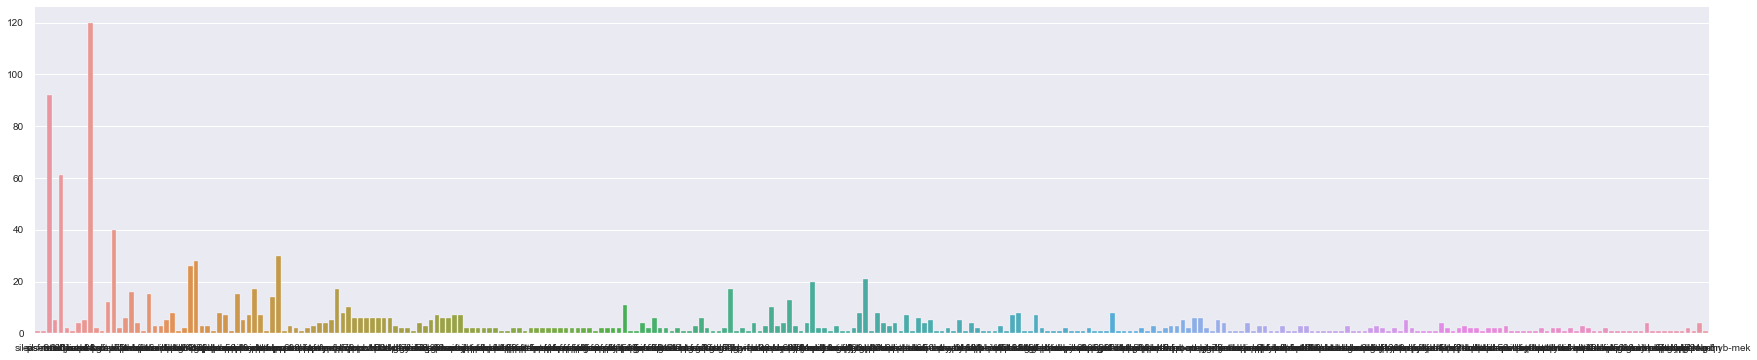

In [45]:
#This is a mess....

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize = (30,6))
sns.barplot(list(prod.keys()),list(prod.values()))
plt.show()